[ 72.    57.6   48.6   41.76  36.    30.24  25.2   25.92  22.68  18.  ]


<IPython.core.display.Javascript object>


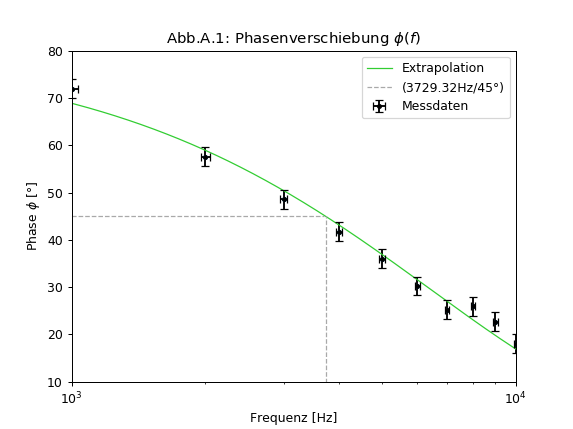

80.5251642033
35.7421191433
229063.666184


In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import pi as pi

f  = np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
dt  = np.array([0.2,0.08,0.045,0.029,0.020,0.014,0.010,0.009,0.007,0.005])
x = np.linspace(0,10000,1000)

p = (2 * np.pi * dt * 10**(-3) * f) / (2*np.pi) *360

df = np.sqrt(f)


print(p)

plt.plot(f,p, ".")
plt.xscale("log")
plt.xlim(1e3,1e4)
plt.ylim(10,80)

def lin(x,a,b,l):
    return a * np.exp( -b * x / l  ) 
    #return a*x+l
     #return np.arctan(1/(2*np.pi*f*))
    
popt, pcov=curve_fit(lin,f[:], p[:], p0=[70, 5, 6000]) 
plt.plot(x, lin(x,*popt), label="Extrapolation", color="limegreen", linewidth=1)
plt.errorbar( f , p , xerr = df, yerr = 2, fmt = '.' , capsize=3, color="black", label="Messdaten")


plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase $\phi$ [°]')
plt.title('Abb.A.1: Phasenverschiebung $\phi(f)$')
plt.plot([1,3700], [45,45], color ='darkgrey', linewidth=1, linestyle="--" , label="(3729.32Hz/45°)")
plt.plot([3729,3729], [0,45], color ='darkgrey', linewidth=1, linestyle="--")
plt.legend()
print(popt[0])
print(popt[1])
print(popt[2])
plt.savefig("C:/Users/Max/241.pdf", format="pdf")